# Lista 03 - ICs + Bootstrap

In [1]:
# -*- coding: utf 8

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

plt.style.use('seaborn-colorblind')
plt.ion()

# Exercício 01:
Vamos utilizar a base de dados de recém-nascidos disponibilizada no exercício.

In [2]:
df = pd.read_csv('baby.csv')

# Convertendo para unidades não EUA
df['Birth Weight'] = 0.0283495 * df['Birth Weight']
df['Maternal Pregnancy Weight'] = 0.0283495 * df['Maternal Pregnancy Weight']
df['Maternal Height'] = 0.0254 * df['Maternal Height']

df.describe()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,3.386703,279.101363,27.228279,1.626855,3.642307
std,0.519609,16.010305,5.817839,0.064163,0.587807
min,1.559222,148.000000,15.000000,1.346200,2.466407
25%,3.061746,272.000000,23.000000,1.574800,3.238930
50%,3.401940,280.000000,26.000000,1.625600,3.543687
75%,3.713785,288.000000,31.000000,1.676400,3.940580
max,4.989512,353.000000,45.000000,1.828800,7.087375


A) Plote uma PDF dos dados da coluna "Gestational Days".

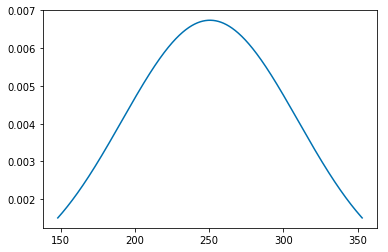

In [3]:
from scipy.stats import norm
df_new = df[['Gestational Days', 'Birth Weight']]
df_new = df_new.groupby(['Gestational Days'])[['Birth Weight']].count().reset_index()
x = np.linspace(df['Gestational Days'].min(), df['Gestational Days'].max(), len(df['Gestational Days']))
plt.plot(x, norm.pdf(x, x.mean(), x.std()))
plt.show()

B) Para o número de dias de gestação, determine com 95% de o Intervalo de Confiança. Não utilize a técnica de bootstrap.

Retorne uma lista com os valores inferior e superior do intervalo de confiança.
Exemplo:
```python
return [inferior,superior]
```

In [4]:
from scipy import stats as ss

def calcula_IC_gestacao(df):
    df_ic = df[['Gestational Days', 'Birth Weight']]
    df_ic = df_new.groupby(['Gestational Days'])[['Birth Weight']].count().reset_index()
    s = np.std(df_ic['Gestational Days'], ddof=1)
    s_over_n = s / np.sqrt(len(df_ic['Gestational Days']))
    return [df_ic['Gestational Days'].mean() - 1.96 * s_over_n, df_ic['Gestational Days'].mean() + 1.96 * s_over_n]

calcula_IC_gestacao(df)

[268.14996584386614, 281.77311107921076]

C) Na função abaixo, retorne o número da opção que melhor define o que indica o Intervalo de Confiança:

    1: A média da amostra está com 95% de probabilidade dentro do intervalo
    2: 95% dos valores da população estão dentro do intervalo
    3: O intervalo inclui a média da população com 95% de probabilidade
    4: 5% da amostra está a mais que 1.96 de distância da média da população
    5: Nenhuma das anteriores

In [5]:
def resposta():
    return 2

# Exercício 02:

Agora vamos calcular intervalos de confiança utilizando bootstrap.

A) Para a coluna "Maternal Age", plote um histograma dos valores.

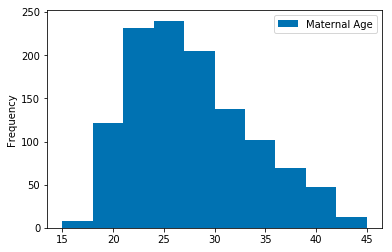

In [6]:
df_m = df[['Maternal Age']]
df_m.plot.hist()

B) Utilizando o mesmo atributo, execute um bootstrap com 5000 amostras e plote a distribuição das medianas.

(array([3904.,    0.,    0.,    0.,    0.,   80.,    0.,    0.,    0.,
        1016.]),
 array([26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27. ]),
 <a list of 10 Patch objects>)

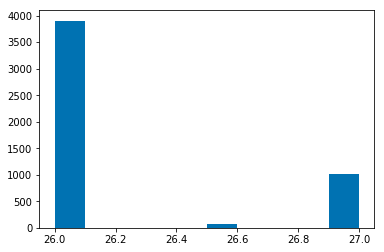

In [7]:
def bootstrap_median(df_m, n=5000, size=None):
    if size is None:
        size = len(df_m)
    values = np.zeros(n)
    for i in range(n):
        sample = df.sample(size, replace=True)
        values[i] = sample['Maternal Age'].median()
    return values
values = bootstrap_median(df_m)
plt.hist(values)

# Exercício 03:

Plote, em escala log-log, a distribuição dos dados no arquivo "lista.csv".

In [8]:
dados = pd.read_csv('lista.csv')['valores']

A) Calcule a média, mediana, variância, e desvio padrão. Retorne em uma lista da seguinte forma:
```python
return [media,mediana,var,desvio]
```

In [9]:
def ex3(dados):
    return [dados.mean(), dados.median(), dados.var(), dados.std()]
ex3(dados)

[19.50892087573598, 1.0042548724785347, 3257589.8969675335, 1804.8794688198805]

B) Calcule o intervalo de confiança, com confiança de 95%. Retorne em uma lista da seguinte forma:
```python
return [inferior,superior]
```

In [12]:
def ex3_IC(df):
    s = np.std(df, ddof=1)
    s_over_n = s / np.sqrt(len(df))
    return [df.mean() - 1.96 * s_over_n, df.mean() + 1.96 * s_over_n]

ex3_IC(dados)

[8.322162029586451, 30.69567972188551]

C) Plote a distribuição dos valores dos dados, em escala log-log. 

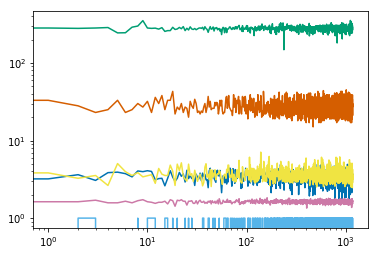

In [11]:
plt.loglog(df)

D) Tente explicar o por quê de os valores calculados ficaram tão elevados.

YOUR ANSWER HERE